In [15]:
import torch
from src.depth_est_dpt import dpt_depth
from src.sem_seg_dpt import dpt_semantic, dpt_get_labels
from src.utils.image_utils import semantic_overlay, load_image, save_image, save_plot, norm_depth

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Laptop GPU'

In [2]:
image = load_image("data/0024mod/0024clarity.jpg")


In [3]:
depth_image = dpt_depth(image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

Image.fromarray(depth_image).show()
# plt.imshow(depth_image)

In [41]:
seg_image = dpt_semantic(image)

In [42]:
dpt_get_labels()

{0: 'wall',
 1: 'building',
 2: 'sky',
 3: 'floor',
 4: 'tree',
 5: 'ceiling',
 6: 'road',
 7: 'bed ',
 8: 'windowpane',
 9: 'grass',
 10: 'cabinet',
 11: 'sidewalk',
 12: 'person',
 13: 'earth',
 14: 'door',
 15: 'table',
 16: 'mountain',
 17: 'plant',
 18: 'curtain',
 19: 'chair',
 20: 'car',
 21: 'water',
 22: 'painting',
 23: 'sofa',
 24: 'shelf',
 25: 'house',
 26: 'sea',
 27: 'mirror',
 28: 'rug',
 29: 'field',
 30: 'armchair',
 31: 'seat',
 32: 'fence',
 33: 'desk',
 34: 'rock',
 35: 'wardrobe',
 36: 'lamp',
 37: 'bathtub',
 38: 'railing',
 39: 'cushion',
 40: 'base',
 41: 'box',
 42: 'column',
 43: 'signboard',
 44: 'chest of drawers',
 45: 'counter',
 46: 'sand',
 47: 'sink',
 48: 'skyscraper',
 49: 'fireplace',
 50: 'refrigerator',
 51: 'grandstand',
 52: 'path',
 53: 'stairs',
 54: 'runway',
 55: 'case',
 56: 'pool table',
 57: 'pillow',
 58: 'screen door',
 59: 'stairway',
 60: 'river',
 61: 'bridge',
 62: 'bookcase',
 63: 'blind',
 64: 'coffee table',
 65: 'toilet',
 66: '

In [43]:
seg_street = seg_image == 6
seg_street

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

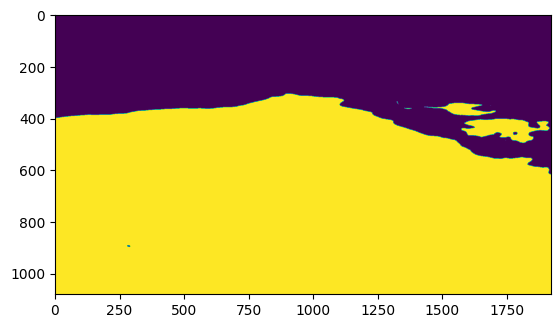

In [44]:
plt.imshow(seg_street)

In [16]:
depth_image_norm = norm_depth(depth_image)
depth_image_norm

array([[  2,   2,   2, ...,  25,  25,  25],
       [  2,   2,   2, ...,  25,  25,  25],
       [  2,   2,   2, ...,  25,  25,  25],
       ...,
       [253, 253, 253, ..., 238, 238, 238],
       [253, 253, 253, ..., 238, 238, 238],
       [253, 253, 253, ..., 238, 238, 238]], dtype=uint8)

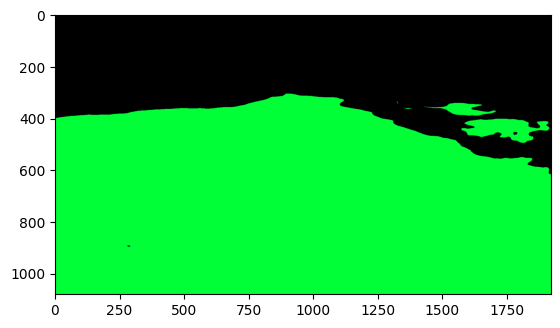

In [53]:
import numpy as np
import cv2

# interpolate to use the full color range
depth_int_color = cv2.applyColorMap(depth_image_norm, cv2.COLORMAP_INFERNO)
seg_street_color = np.zeros_like(depth_int_color)

seg_street_color[ seg_street, :] = [0, 255, 55]
plt.imshow(seg_street_color)

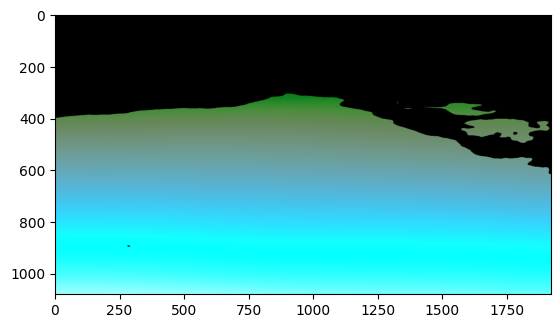

In [68]:

seg_street_overlay = cv2.addWeighted(depth_int_color, 1, seg_street_color, 0.5, 0)
seg_street_overlay[seg_street == False, :] = [0, 0, 0]
plt.imshow(seg_street_overlay)

In [63]:

# Calibration values
PX1 = 230
PX2 = 169
# Set color for each distance
depth_int_color[depth_int == PX1] = [255, 0, 255]
depth_int_color[depth_int == PX2] = [0, 255, 0]

# plt.imshow(depth_int_color)
overlay = cv2.addWeighted(image, 0.5, depth_int_color, 0.5, 0)
plt.imshow(overlay)

NameError: name 'depth_int' is not defined